# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))

# Import custom modules from src package
from src import (
    load_data, 
    downsample_data,
    cast_types,
    label_churn,
    plot_churn_distribution, 
    plot_avg_songs_per_session, 
    plot_error_frequency, 
    plot_user_journeys
)

np.random.seed(42)

In [2]:
df = load_data('../data/train.parquet')
df.sample(5)

,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
8415245,200,M,August,paid,Clark,1207487,1540518498000,Logged In,NextSong,112798,"Riverside-San Bernardino-Ontario, CA",400,Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:1...,PUT,236.04200,Hostile [Live Version],Pantera,2018-10-26 01:48:18,2018-09-10 17:03:47
12828473,200,F,Alani,paid,Kane,1325330,1541672419000,Logged In,NextSong,159518,"Tampa-St. Petersburg-Clearwater, FL",74,Mozilla/5.0 (Windows NT 6.1; rv:31.0) Gecko/20...,PUT,194.03710,Karibien,Air France,2018-11-08 10:20:19,2018-09-05 06:02:19
13490632,200,F,Angelina,paid,Singh,1495032,1541826321000,Logged In,NextSong,174513,"Santa Maria-Santa Barbara, CA",216,"""Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like...",PUT,278.07302,Through The Wire,Kanye West,2018-11-10 05:05:21,2018-08-24 13:24:27
9329450,200,M,Nathaniel,paid,Norris,1525270,1540794304000,Logged In,NextSong,128771,"San Francisco-Oakland-Hayward, CA",120,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,132.85832,Ride A White Swan,T. Rex,2018-10-29 06:25:04,2018-06-23 13:42:06
13901146,200,M,Landyn,paid,Evans,1849720,1541985370000,Logged In,NextSong,179047,"Atlanta-Sandy Springs-Roswell, GA",74,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,266.65751,Black Planet (Remastered),Sisters Of Mercy,2018-11-12 01:16:10,2018-08-25 21:44:42


## Dataset Size Analysis & Sampling
Analyze the size of the dataset and downsample for preliminary exploration to speed up execution.

In [3]:
# Check dataset size and memory usage
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: (17499636, 19)
Memory Usage: 15633.13 MB
Memory Usage: 15633.13 MB


In [4]:
# # Downsample for exploration if dataset is large
# df = downsample_data(df, fraction=0.1, random_state=42)

## Data Cleaning

- **Type Casting**: Ensure `userId` is a string and `ts`/`registration` are datetime objects.
- **Missing Values**: Analyze and handle `NaN` values (especially in `userId`).

In [5]:
# Type Casting and Cleaning
df = cast_types(df)

print("\nData shape after cleaning:", df.shape)
df.sample(5)


Data shape after cleaning: (17499636, 19)


,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
5717996,200,M,Lucas,paid,Gill,1431632,2018-10-18 08:14:19,Logged In,Home,88268,"Bay City, MI",63,"""Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537....",GET,NaN,None,None,2018-10-18 08:14:19,2018-09-21 15:14:01
4203448,200,M,Nathaniel,paid,Richard,1731326,2018-10-13 18:01:54,Logged In,NextSong,73504,"Coffeyville, KS",122,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,200.07138,Cry For Help (Album Version),Shinedown,2018-10-13 18:01:54,2018-09-21 17:34:40
2752109,307,F,Nevaeh,paid,Ellison,1860717,2018-10-09 17:16:42,Logged In,Thumbs Up,60887,"Phoenix-Mesa-Scottsdale, AZ",37,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,NaN,None,None,2018-10-09 17:16:42,2018-08-18 08:36:40
12712963,200,M,Ryan,paid,Myers,1954143,2018-11-08 01:41:42,Logged In,Settings,159835,"Houston-The Woodlands-Sugar Land, TX",341,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",GET,NaN,None,None,2018-11-08 01:41:42,2018-07-28 16:32:06
1017469,200,M,Brett,paid,Mcintosh,1077832,2018-10-04 03:16:21,Logged In,NextSong,27221,"Pittsburgh, PA",103,"""Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X...",PUT,248.11057,It's Time I Go (Jazz),Joyce Cooling,2018-10-04 03:16:21,2018-08-03 04:59:35


## Define Churn

Create a binary target variable `churn` (1 if user visited `Cancellation Confirmation` within the next 10 days).

**Definition**:
- We identify the exact timestamp when a user churned (`Cancellation Confirmation`).
- For each event (row) in the dataset, we calculate the time difference to the user's churn event.
- **Target**: `churn = 1` if the event occurred within the **10 days leading up to churn**.
- **Target**: `churn = 0` otherwise (for non-churners, or for churners more than 10 days before the event).

This allows us to analyze the specific behavior patterns that manifest just before a user churns ("pre-churn behavior").

In [6]:
# Define Churn (Pre-churn behavior window)
df = label_churn(df, window_days=10)

print(f"Total events: {len(df)}")
print(f"Churn events (pre-churn behavior): {df['churn'].sum()}")
print(f"Percentage of events labeled as churn: {df['churn'].mean():.2%}")

# Verify
sample_churner = df[df['churn'] == 1]['userId'].iloc[0]
print(f"\nSample Churner: {sample_churner}")
print(df[df["userId"] == sample_churner][["ts", "page", "churn"]].head(5))
print(df[df["userId"] == sample_churner][["ts", "page", "churn"]].tail(5))

Total events: 17499636
Churn events (pre-churn behavior): 1810573
Percentage of events labeled as churn: 10.35%

Sample Churner: 1749042
                   ts      page  churn
0 2018-10-01 00:00:01  NextSong      0
1 2018-10-01 00:08:45  NextSong      0
2 2018-10-01 00:11:43  NextSong      0
3 2018-10-01 00:15:35  NextSong      0
4 2018-10-01 00:20:00  NextSong      0
                      ts                       page  churn
1218 2018-10-21 01:01:44                     Logout      1
1219 2018-10-21 01:08:13                       Home      1
1220 2018-10-21 01:09:53                  Downgrade      1
1221 2018-10-21 01:09:54                     Cancel      1
1222 2018-10-21 01:16:24  Cancellation Confirmation      1
                   ts      page  churn
0 2018-10-01 00:00:01  NextSong      0
1 2018-10-01 00:08:45  NextSong      0
2 2018-10-01 00:11:43  NextSong      0
3 2018-10-01 00:15:35  NextSong      0
4 2018-10-01 00:20:00  NextSong      0
                      ts                 

## EDA

- Plot distribution of Churn (Check for **Class Imbalance**).
- Compare behavior: "Average songs played per session for Churners vs. Non-Churners".
- Frequencies of errors before churning.
- Visualization of standard users journey to `churn`.

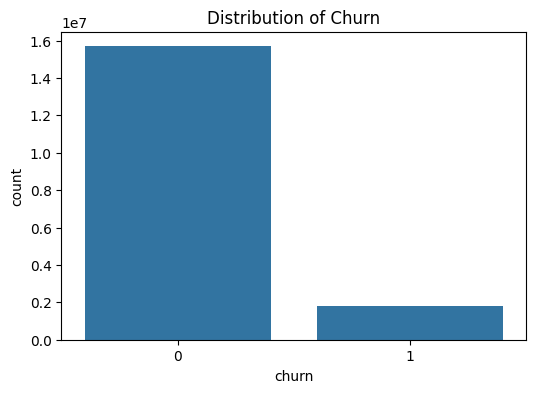

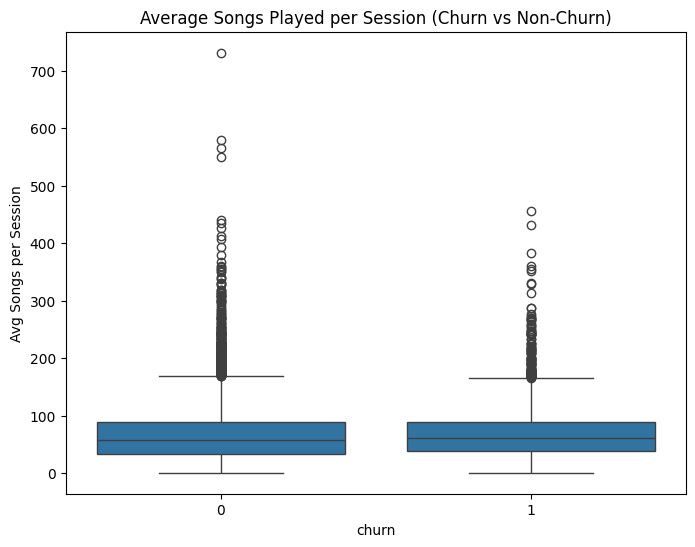

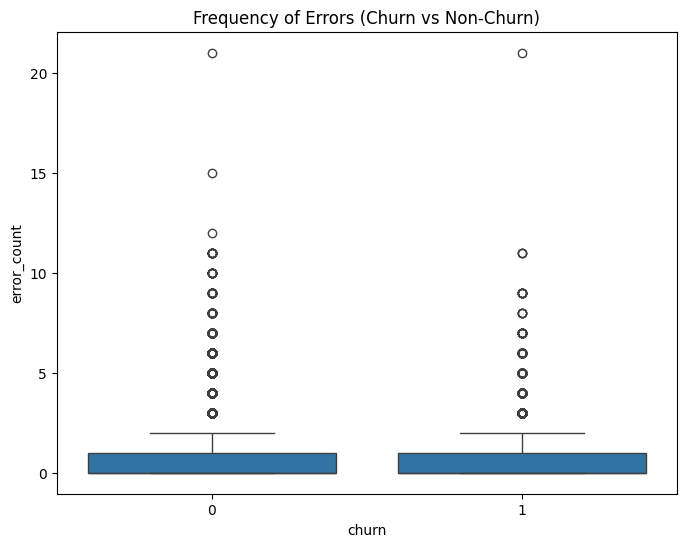

In [7]:
# Plot distribution of Churn
plot_churn_distribution(df)

# Average songs played per session for Churners vs. Non-Churners
plot_avg_songs_per_session(df)

# Frequencies of errors
plot_error_frequency(df)

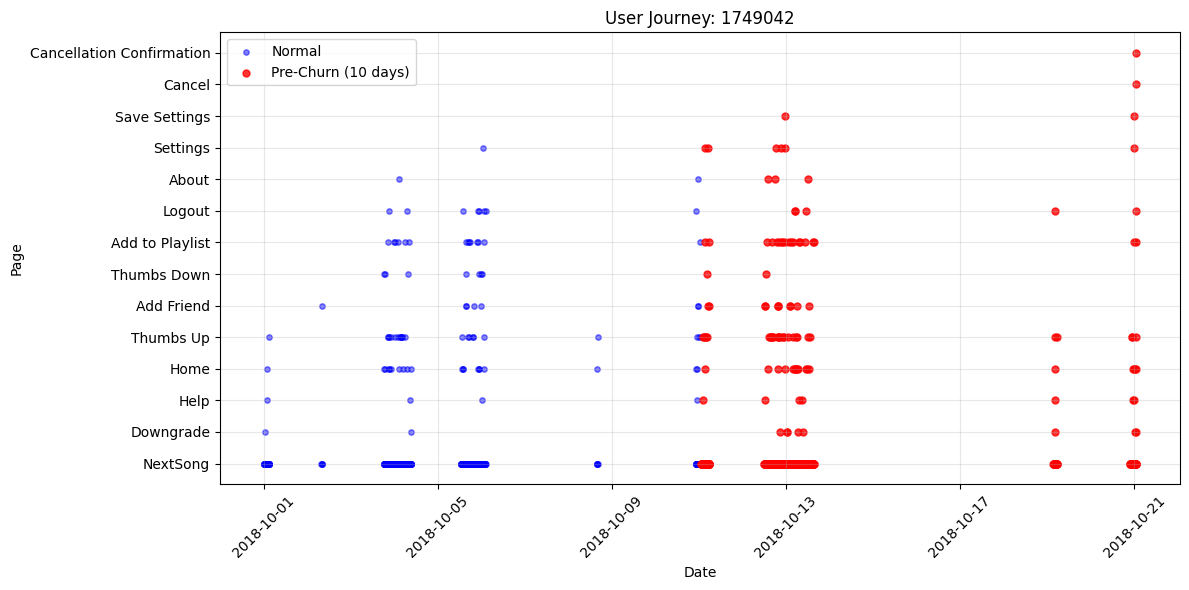

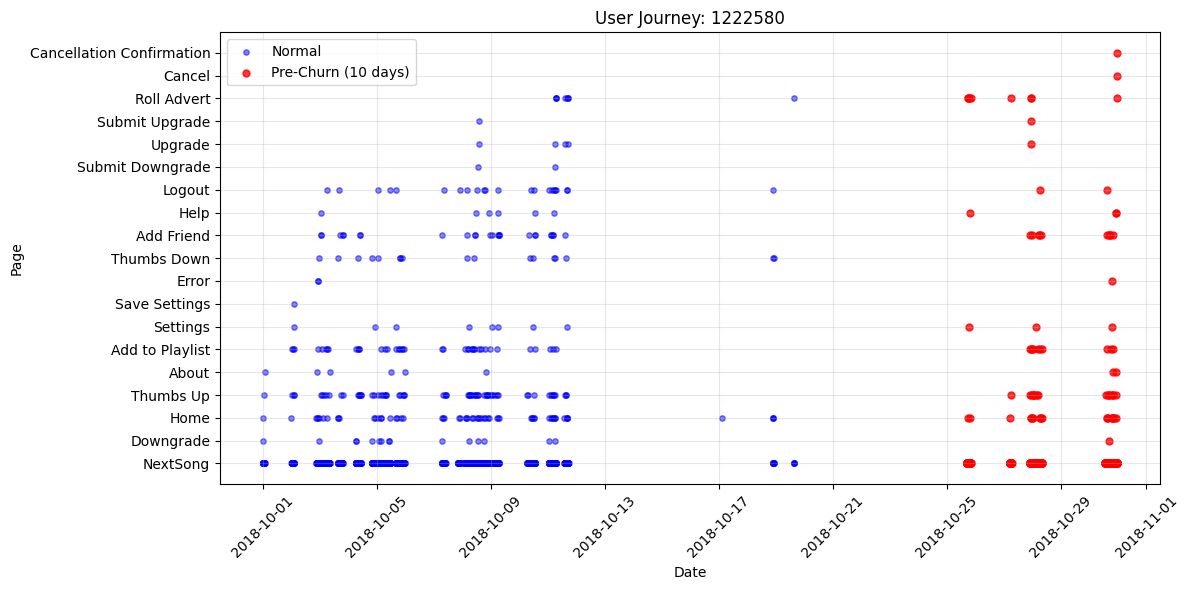

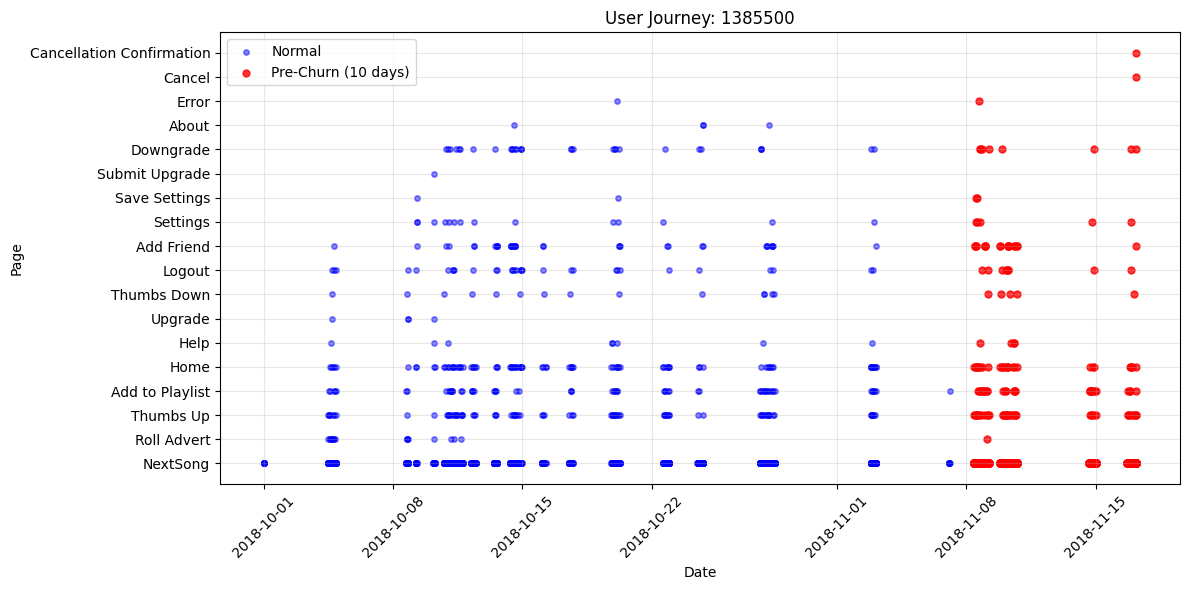

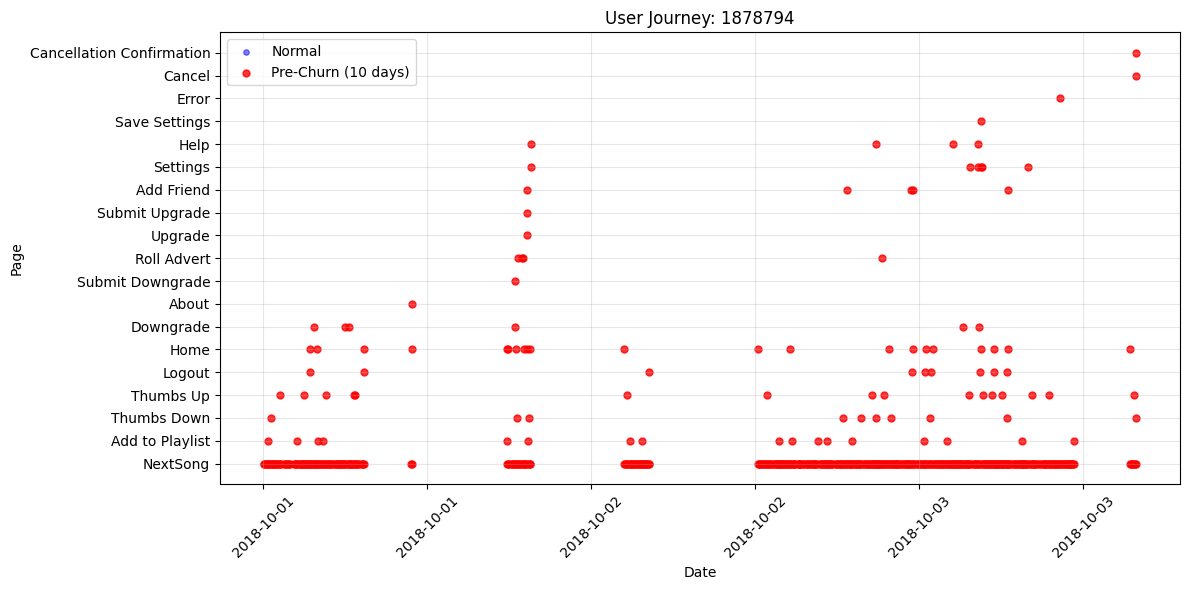

In [8]:
# Visualization of standard users journey to churn
# Get list of churn users from the dataframe
churn_users = df[df['churn_ts'].notna()]['userId'].unique()

# Pick a few churn users, ensuring we include the target user if present
target_user = '1878794'
sample_churn_users = list(churn_users[:3])
if target_user in churn_users and target_user not in sample_churn_users:
    sample_churn_users.append(target_user)

if len(sample_churn_users) > 0:
    plot_user_journeys(df, sample_churn_users)
else:
    print("No churn users found to visualize.")

In [9]:
from src import (
    check_ts_vs_time,
    plot_categorical_churn_impact,
    plot_numerical_churn_impact,
    analyze_location,
    analyze_user_agent,
    analyze_page_distribution
)

# 1. Check ts vs time
check_ts_vs_time(df)

Total difference between 'ts' and 'time': 0 days 00:00:00
Columns 'ts' and 'time' are identical (after conversion). You can drop 'time'.


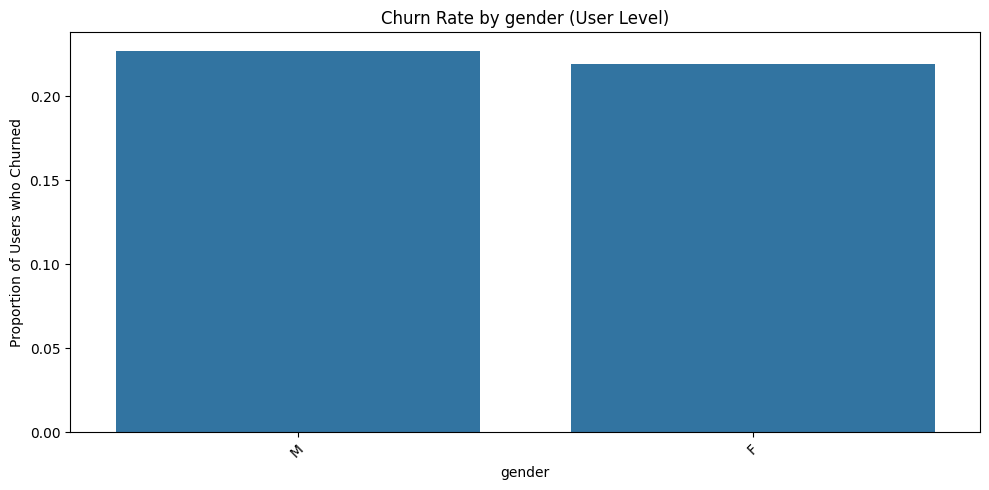

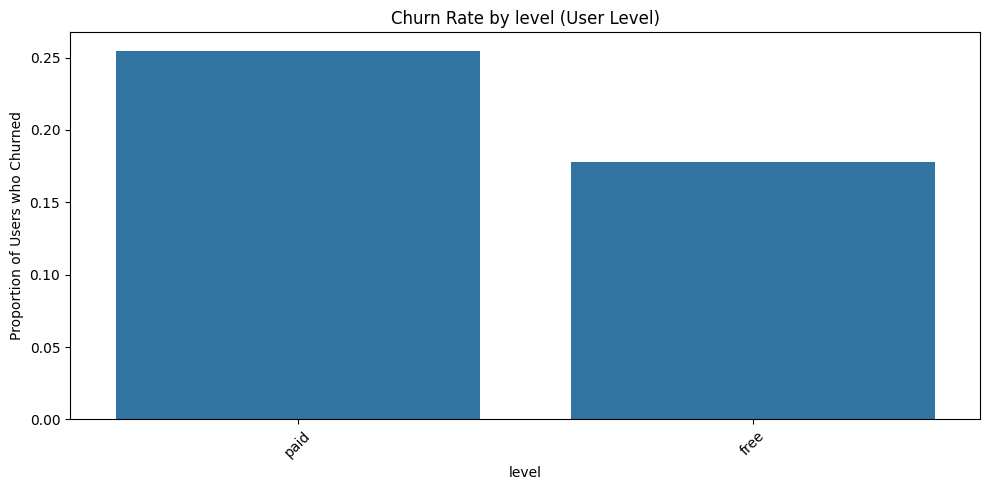

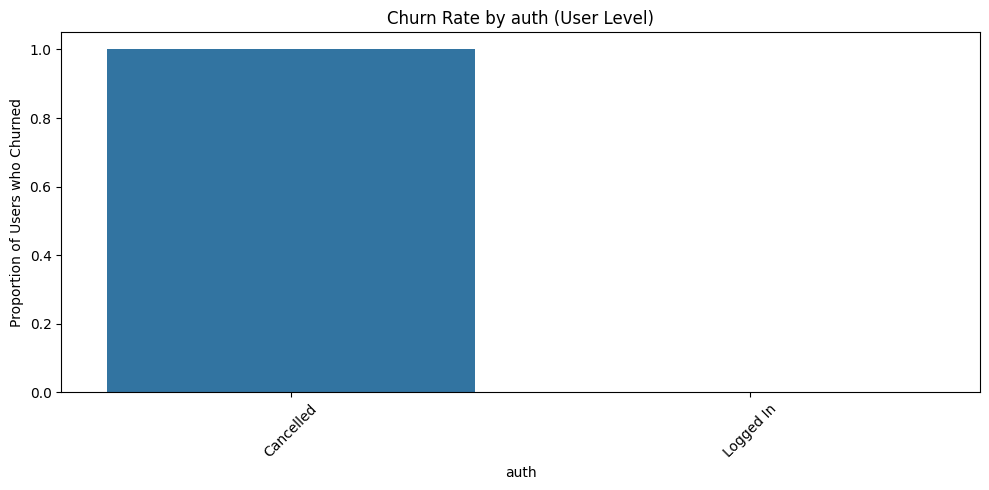

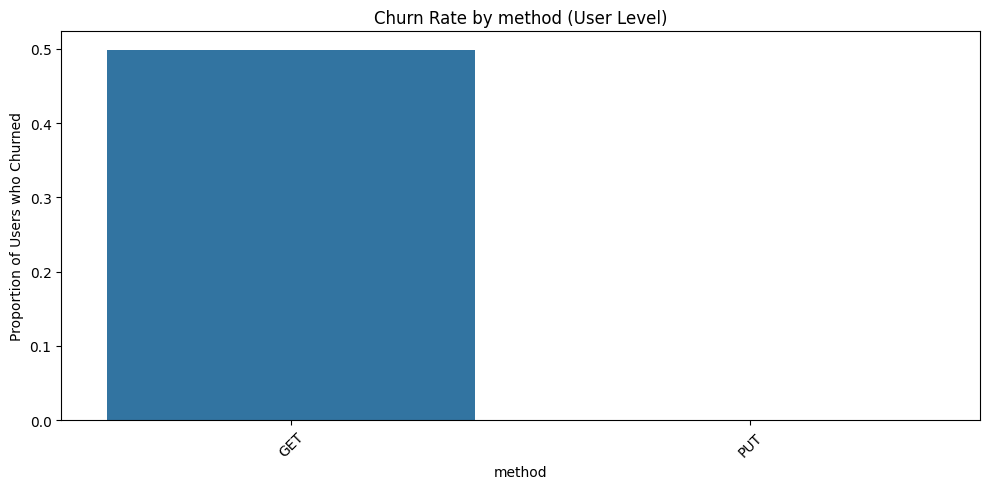

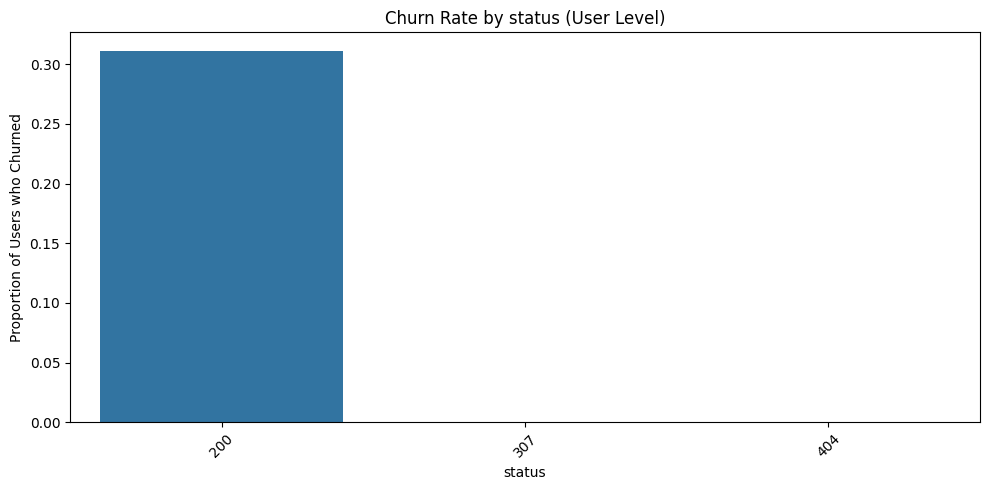

In [10]:
# 2. Categorical Feature Analysis
# Columns: gender, level, auth, method, status
categorical_cols = ['gender', 'level', 'auth', 'method', 'status']
plot_categorical_churn_impact(df, categorical_cols)

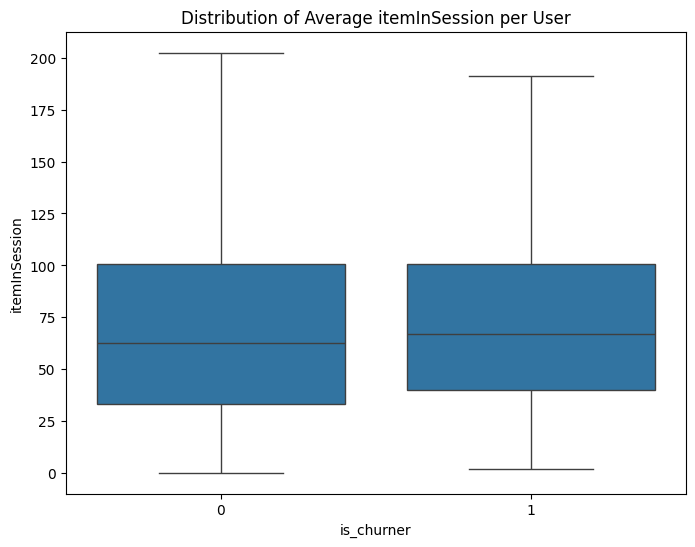

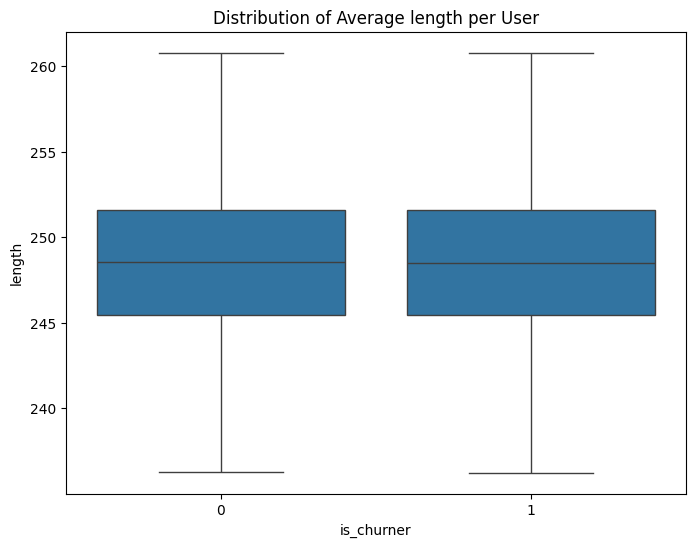

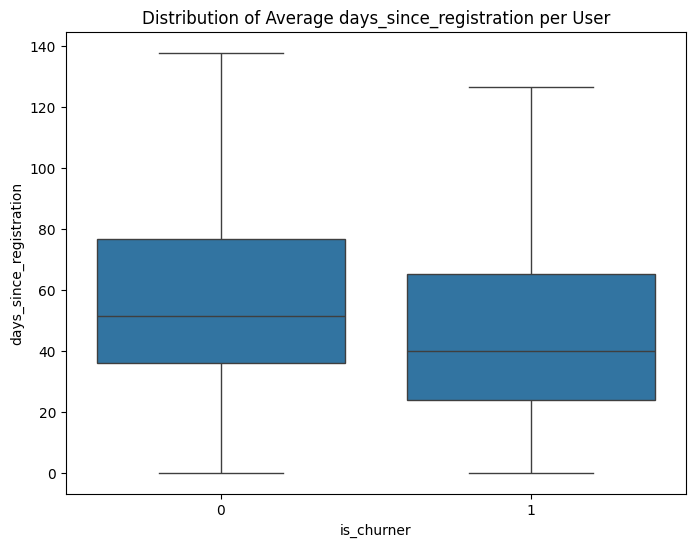

In [11]:
# 3. Numerical Feature Analysis
# Columns: itemInSession, length
# Also calculate 'days_since_registration'
df['days_since_registration'] = (df['ts'] - df['registration']).dt.total_seconds() / (24 * 3600)  # type: ignore

numerical_cols = ['itemInSession', 'length', 'days_since_registration']
plot_numerical_churn_impact(df, numerical_cols)

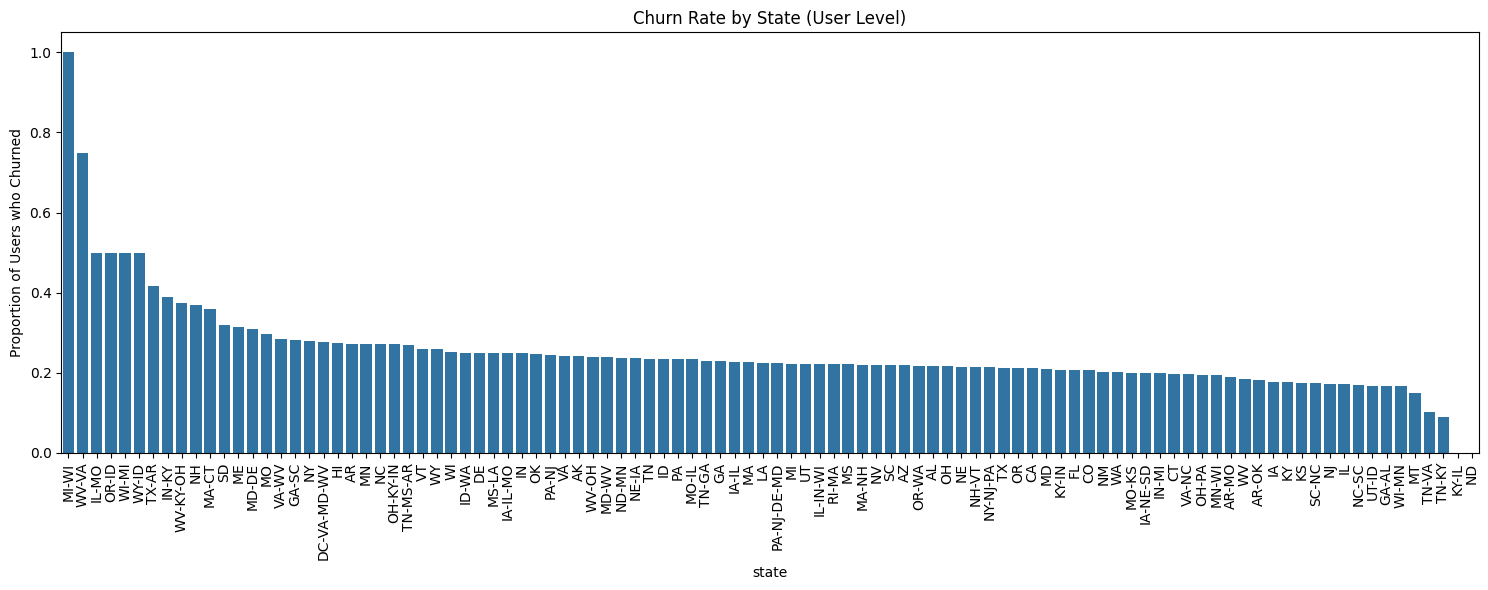

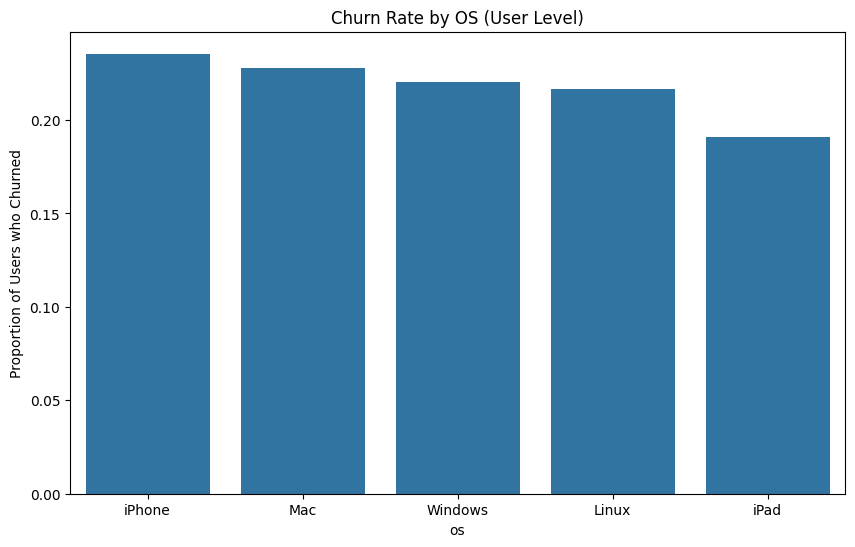

In [12]:
# 4. Location and User Agent Analysis
analyze_location(df)
analyze_user_agent(df)

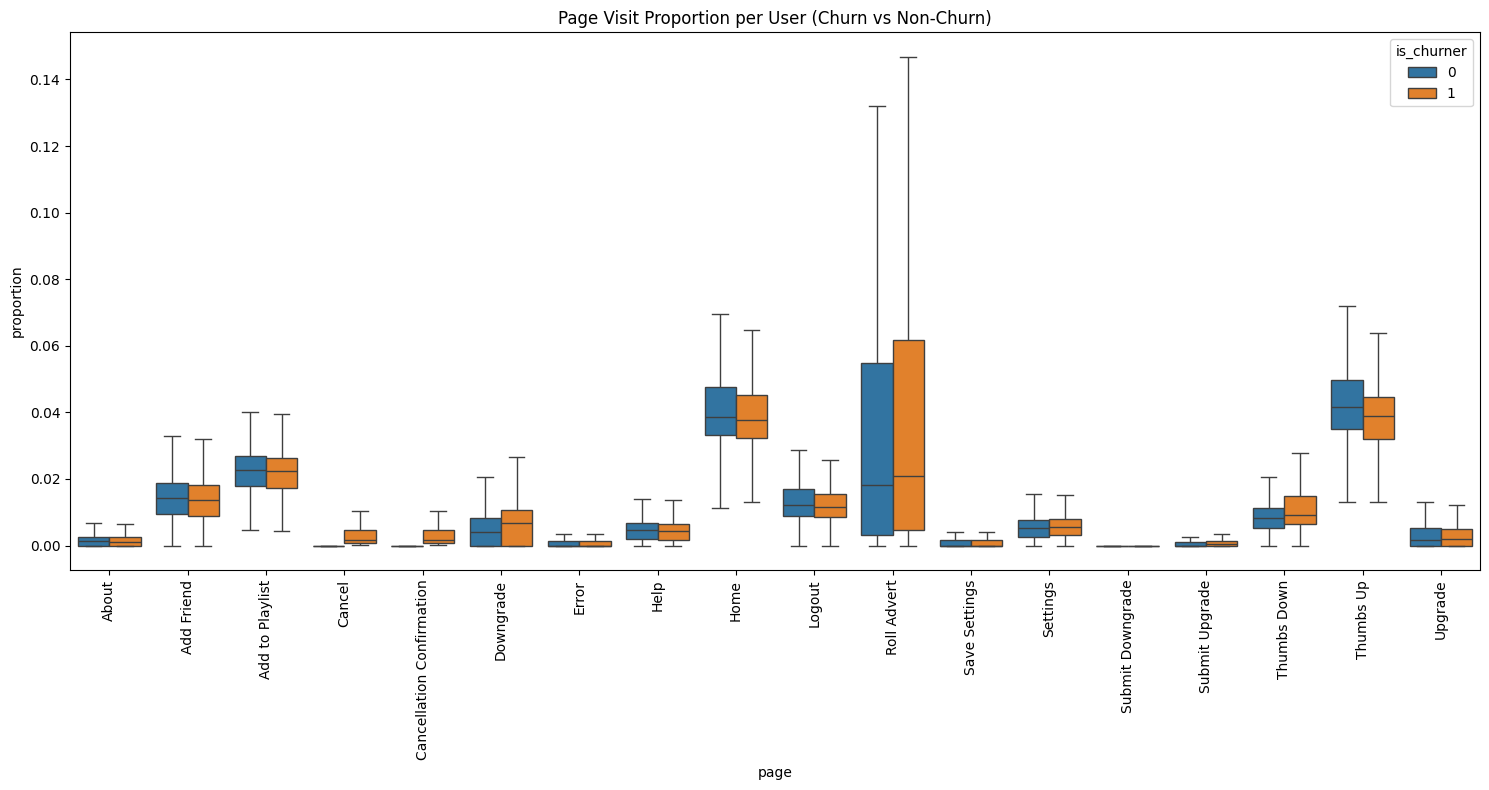

In [13]:
# 5. Page Distribution Analysis
analyze_page_distribution(df, ignore_pages=['NextSong'])

## Leakage & Relevance Deep Dive

Investigating specific columns for potential data leakage or irrelevance:
- **Level**: Verifying if free users can churn.
- **Auth**: Checking for states that might directly indicate cancellation (leakage).
- **Method/Status**: Assessing if these technical fields hold predictive value.

In [14]:
# Deep Dive: Leakage & Relevance Analysis (Level, Auth, Method, Status)

print("--- 1. Level Analysis: Can free users churn? ---")
# Check the level of users who have a churn event, specifically looking at the events in the churn window
churn_window_events = df[df['churn'] == 1]
print("Distribution of 'level' for events within the 10-day pre-churn window:")
print(churn_window_events['level'].value_counts(normalize=True))

# Check if any user was ALWAYS free and churned
churner_ids = df[df['churn_ts'].notna()]['userId'].unique()

# OPTIMIZED: Instead of looping, use set operations
# 1. Find all users who have EVER been 'paid'
paid_users = df[df['level'] == 'paid']['userId'].unique()

# 2. Find churners who are NOT in the 'paid_users' list (meaning they were always free)
free_churners = np.setdiff1d(churner_ids, paid_users)

print(f"\nNumber of churners who were NEVER paid: {len(free_churners)}")
if len(free_churners) > 0:
    print(f"Example free churner: {free_churners[0]}")

print("\n--- 2. Auth Analysis: Potential Leakage? ---")
print("Unique Auth values:", df['auth'].unique())
# Check if 'Cancelled' or similar exists in auth
# And check distribution in pre-churn window
print("\nAuth distribution in pre-churn window:")
print(churn_window_events['auth'].value_counts())

print("\n--- 3. Method & Status Analysis ---")
print("Unique Methods:", df['method'].unique())
print("Unique Statuses:", df['status'].unique())

# Check if specific combinations are highly correlated with churn window
print("\nTop Method/Status combinations in pre-churn window:")
print(churn_window_events.groupby(['method', 'status']).size().sort_values(ascending=False).head())

--- 1. Level Analysis: Can free users churn? ---
Distribution of 'level' for events within the 10-day pre-churn window:
level
paid    0.793366
free    0.206634
Name: proportion, dtype: float64

Number of churners who were NEVER paid: 1031
Example free churner: 1000675

--- 2. Auth Analysis: Potential Leakage? ---
Unique Auth values: ['Logged In' 'Cancelled']

Auth distribution in pre-churn window:
auth
Logged In    1806302
Cancelled       4271
Name: count, dtype: int64

--- 3. Method & Status Analysis ---

Number of churners who were NEVER paid: 1031
Example free churner: 1000675

--- 2. Auth Analysis: Potential Leakage? ---
Unique Auth values: ['Logged In' 'Cancelled']

Auth distribution in pre-churn window:
auth
Logged In    1806302
Cancelled       4271
Name: count, dtype: int64

--- 3. Method & Status Analysis ---
Unique Methods: ['PUT' 'GET']
Unique Statuses: [200 307 404]

Top Method/Status combinations in pre-churn window:
method  status
PUT     200       1513656
        307     

## Feature Engineering Discussion

Based on the EDA, here are potential features to implement:

1.  **Seasonality**:
    *   Hour of day (users might churn after late-night sessions).
    *   Day of week (churn on weekends vs weekdays).
2.  **Aggregations (Rolling Windows)**:
    *   **Error Rate**: Number of errors in the last 1/3/7 days.
    *   **Listening Activity**: Number of songs played in the last 1/3/7 days.
    *   **Session Duration**: Average session length over time.
3.  **User Attributes**:
    *   **Account Age**: Days since registration (already explored, seems significant).
    *   **Platform**: OS extracted from UserAgent.
    *   **Location**: State extracted from Location.
4.  **Behavioral Flags**:
    *   **Downgrade**: Did the user recently downgrade from paid to free?
    *   **Thumbs Up/Down Ratio**: Satisfaction metric.
    *   **Ad Interaction**: Frequency of "Roll Advert".

**Next Steps**:
Implement these features in the `src/features.py` module and create a new notebook for Feature Engineering & Modeling.